# Primer Examen Parcial
## Mario Valverde

## Primer ejercicio: Encriptación

In [44]:
import numpy as np
# from MatrizInversa import Inversa

class Inversa:

    def cambiarFilas(self, matriz, fila):
        """
        Busca una fila válida para intercambiar (si existe)
        """

        cambio = 0
        for i in range(1, len(matriz) - fila):
            if matriz[fila + i][fila] != 0:
                cambio = i
                break

        if not cambio:
            return False

        fila1 = fila
        fila2 = fila + cambio

        temp = matriz[fila1].copy()
        matriz[fila1] = matriz[fila2]
        matriz[fila2] = temp
        return matriz

    def sumarFilas(self, matriz, fila):
        """
        Suma para reducir todas los números debajo
        """

        for i in range(1, len(matriz) - fila):
            reduccion = matriz[fila][fila].copy()
            multiplo = -1*matriz[fila+i][fila].copy()
            matriz[fila + i] = matriz[fila+i] + \
                matriz[fila] * multiplo / reduccion
        return matriz

    def checarCeros(self, matriz, fila):
        """
        Verifica que no haya únicamente 0s en la columna
        """
        if matriz[fila][fila] == 0:
            return True
        return False

    def transformar(self, matriz):
        """
        Invierte la matriz vertical y horizontalmente
        """
        copia = matriz.copy()
        finalInv = matriz.copy()
        for i in range(0, len(matriz)):
            finalInv[i] = copia[-1+-i]
        a = np.hsplit(finalInv, 2)[0]
        aCopia = a.copy()
        b = np.hsplit(finalInv, 2)[1]
        bCopia = b.copy()
        for i in range(0, len(a)):
            for j in range(0, len(a[0])):
                a[i][j] = aCopia[i][-1-j]
                b[i][j] = bCopia[i][-1-j]
        finalInv = np.concatenate((a, b), axis=1)
        return finalInv

    def Gauss(self, matriz):
        """
        Aplica el método de Gauss verificando que tenga solución
        """

        for fila in range(0, len(matriz)):
            if self.checarCeros(matriz, fila):
                matriz = self.cambiarFilas(matriz, fila)
                if not np.any(matriz):
                    return False
            self.sumarFilas(matriz, fila)
        return matriz

    def unos(self, matriz):
        """
        Simplifica la filas para que queden 1s en la diagonal
        """

        for i in range(0, len(matriz)):
            matriz[i] /= matriz[i][i]
        return matriz

    def inversa(self, matriz):
        """
        Método para calcular la inversa de una matriz
        """

        matriz = np.concatenate((matriz, np.identity(len(matriz))), axis=1)
        matriz = self.Gauss(matriz)
        if not np.any(matriz):
            print("La matriz no tiene solución")
            return False
        matriz = self.transformar(matriz)
        matriz = self.Gauss(matriz)
        matriz = self.transformar(matriz)
        matriz = self.unos(matriz)
        return np.hsplit(matriz, 2)[1]

class Encrypt:

    # Método para imprimir los elementos de una matriz de enteros
    def imprimirMatrizInt(self, M):
        for i in range(len(M)):
            for j in range(len(M[0])):
                print(round((M.item(i,j))), end=' ') # Imprimir ASCII
        
        print('\n')
    
    # Devuelve la matriz encriptada
    def transformar(self, A, M):
        return np.matmul(A,M)

    def imprimitAsciiToStr(self, M):
        for i in range(len(M)):
            for j in range(len(M[0])):
                print(chr(int(round(M[i][j]))), end=' ')
        print('\n')
        
    

        

def main():

    # Definición del objeto Encrypt
    objE = Encrypt()

    # Cadena de 16 caracteres (Esta cadena podría variar)
    message = "Ataca a las 9:30"

    # Convertir la cadena de entrada a una matrix de enteros   
    M = np.ndarray(shape=(4,4), dtype=np.int32)

    for i in range(len(M)):
        for j in range(len(M[0])):
            M[i][j] = ord(message[(len(M)*i)+j]) # Función ord convierte un char en su correspondiente ASCII

    print("Matriz con el mensaje en Enteros: \n", M , "\n")

    print("Su mensaje:")
    objE.imprimitAsciiToStr(M)

    print("Mensaje con su equivalente en ASCII:")
    objE.imprimirMatrizInt(M) # Imprimir elementos de la matriz

    # Matrix invertible de 4 x 4, 16 elementos en total
    A = np.array([ [-3, -3, -4, -5], 
                    [0,   1,  1,  6],
                    [4,   3,  4,  8],
                    [2,   -9, 7,  9]])

    # Calcular inversa de la matriz A
    A_inversa = Inversa().inversa(A)

    # Encontrar la matriz encriptdad
    encriptada = objE.transformar(A,M)

    print("La matriz encriptada es:\n", encriptada)

    #Desencpritamos
    desencriptada = objE.transformar(A_inversa, encriptada)

    print("La matriz desencriptada es:\n", desencriptada)
    print("Su mensaje desencriptado es:")
    objE.imprimitAsciiToStr(desencriptada)

    print("Su mensaje desencriptado en ASCII:")
    objE.imprimirMatrizInt(desencriptada)



    

if __name__ == "__main__":
    main()


Matriz con el mensaje en Enteros: 
 [[ 65 116  97  99]
 [ 97  32  97  32]
 [108  97 115  32]
 [ 57  58  51  48]] 

Su mensaje:
A t a c a   a   l a s   9 : 3 0 

Mensaje con su equivalente en ASCII:
65 116 97 99 97 32 97 32 108 97 115 32 57 58 51 48 

La matriz encriptada es:
 [[-1203 -1122 -1297  -761]
 [  547   477   518   352]
 [ 1439  1412  1547  1004]
 [  526  1145   585   566]]
La matriz desencriptada es:
 [[ 65. 116.  97.  99.]
 [ 97.  32.  97.  32.]
 [108.  97. 115.  32.]
 [ 57.  58.  51.  48.]]
Su mensaje desencriptado es:
A t a c a   a   l a s   9 : 3 0 

Su mensaje desencriptado en ASCII:
65 116 97 99 97 32 97 32 108 97 115 32 57 58 51 48 



## Segundo Ejercicio: Raíz

In [42]:
from sympy import *
from sympy.abc import x 
import matplotlib.pyplot as plt
import numpy as np
from copy import copy

'Función original:\n'

 4      3      2           
x  - 4⋅x  - 2⋅x  + 12⋅x - 5

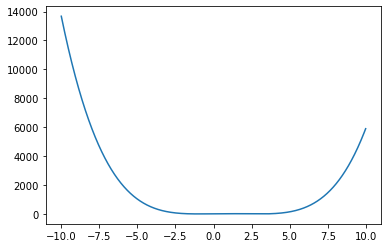

La función tene grado 4, por lo cual debe tener 4 raíces.
método de la secante
raiz encontrada:  0.491725848359268


método de la secante
raiz encontrada:  3.78238340051634


método de la secante
raiz encontrada:  -1.78238340039160


método de la secante
raiz encontrada:  0.491725848359146




In [43]:
# Habilitar impresión avanzada 
init_printing(use_latex='mathjax')

def Secante(x0, expr, error=0.001, maxIter=100):
    '''
    (opcional) error:
        valor mínimo de error para que se pueda considerar 
        a un número como raíz, considerando el error absoluto
        |x_i+1-x_i|
    (opcional) maxIter:
        número máximo de iteraciones
    '''
    print('método de la secante')
    xp = x0 - 1
    for i in range(maxIter):
        f_x0 = expr.subs(x, x0)
        f_xp = expr.subs(x, xp)
        x1 = x0 - (f_x0 * (copy(x0) - copy(xp)))/(f_x0-f_xp)
        if abs(x1-x0) < error:
            print('raiz encontrada: ', x1)
            return x1
        else:
            xp = x0
            x0 = x1

    print('no se econtró un raíz')
    print('se aproximó el siguiente valor:\n', x1)
    return x1

def main():

    func = x**4 - 4*x**3 - 2*x**2 + 12*x -5
    func = sympify(func)
    display("Función original:\n", func)
    a = np.arange(-10,10, 0.01)
    f = lambdify(x, func, 'numpy')
    b = f(a)
    plt.plot(a, b)
    plt.show()
    grado = degree(func)

    print(f"La función tene grado {grado}, por lo cual debe tener {grado} raíces.")

    for i in range(grado):
        while True:
            x0 = input(f'Ingrese un valor para aproximar la raíz {i+1} \nSi prefiere salir, ingrese "q"')
            if x0 == 'q':
                return
            x0 = float(x0)
            break

        raiz = Secante(x0, func, error= 0.000001, maxIter=1000)
        print('\n')



if __name__ == "__main__":
    main()